# Installation

In [1]:
# install machine gnostic learning packages
# ! pip install machinegnostics # only if not installed

# Data

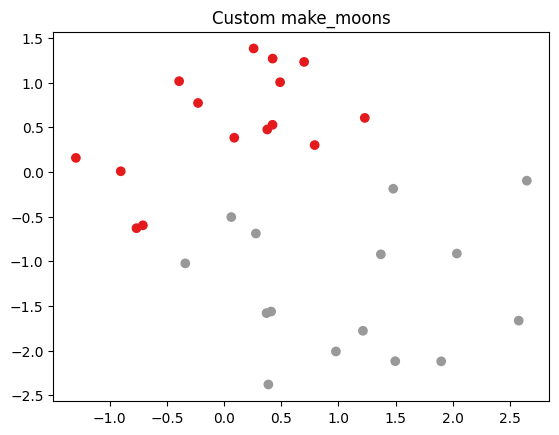

In [2]:

import numpy as np
import matplotlib.pyplot as plt

def make_moons_manual(n_samples=20, noise=0.1):
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    # First half moon
    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out))
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out))
    
    # Second half moon
    inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n_samples_in))
    inner_circ_y = -np.sin(np.linspace(0, np.pi, n_samples_in)) - 0.5

    X = np.vstack([
        np.stack([outer_circ_x, outer_circ_y], axis=1),
        np.stack([inner_circ_x, inner_circ_y], axis=1)
    ])
    y = np.array([0] * n_samples_out + [1] * n_samples_in)

    # Add noise
    X += np.random.normal(scale=noise, size=X.shape)
    
    return X, y

# Example usage
X, y = make_moons_manual(n_samples=30, noise=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.title("Custom make_moons")
plt.show()


# Machine Gnostics Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from machinegnostics.models import LogisticRegressor
from machinegnostics.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score


# Logistic Regressor - Training - Gnostic Sigmoid probability

In [4]:
# using gnostic influenced sigmoid function for probability estimation
model = LogisticRegressor(degree=3,verbose=False, early_stopping=True)
model.fit(X, y)
proba_gnostic = model.predict_proba(X)
y_pred_gnostic = model.predict(X)

# Prediction and Metrics

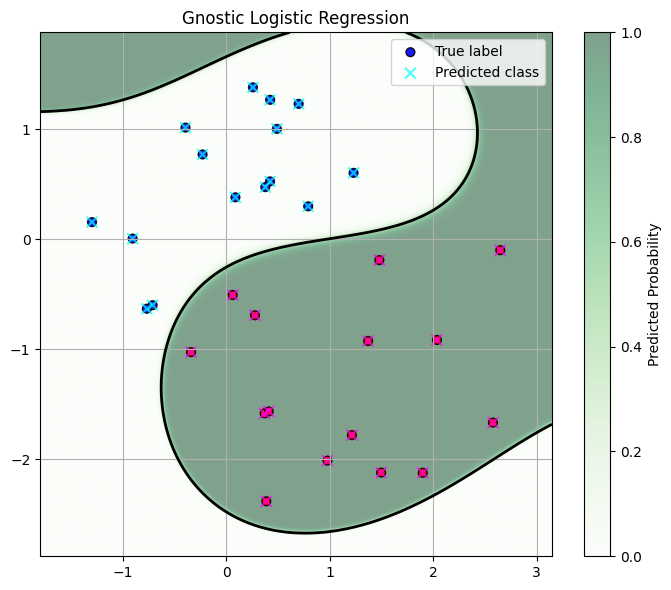

Gnostic Logistic Regression Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Confusion Matrix:
 [[15  0]
 [ 0 15]]

Classification Report:
 Class           Precision    Recall  F1-score   Support
0                    1.00      1.00      1.00        15
1                    1.00      1.00      1.00        15
Avg/Total            1.00      1.00      1.00        30



In [5]:
# --- Plot probability contour and predictions ---
fig, ax = plt.subplots(figsize=(7, 6))

def plot_proba_contour(ax, model, X, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict_proba(grid)
    zz = zz.reshape(xx.shape)

    im = ax.imshow(zz, extent=(x_min, x_max, y_min, y_max), origin='lower',
                   aspect='auto', cmap='Greens', alpha=0.5, vmin=0, vmax=1)
    plt.colorbar(im, ax=ax, label='Predicted Probability')
    ax.contour(xx, yy, zz, levels=[0.5], colors='k', linewidths=2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(title)

plot_proba_contour(ax, model, X, "Gnostic Logistic Regression")
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40, label='True label', alpha=0.9)
ax.scatter(X[:, 0], X[:, 1], c=y_pred_gnostic, cmap='cool', marker='x', s=60, label='Predicted class', alpha=0.7)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# --- Evaluation ---
print('Gnostic Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred_gnostic))
print("Precision:", precision_score(y, y_pred_gnostic))
print("Recall:", recall_score(y, y_pred_gnostic))
print("F1-score:", f1_score(y, y_pred_gnostic))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_gnostic))
print("\nClassification Report:\n", classification_report(y, y_pred_gnostic))

# History

In [6]:
model._history

[{'iteration': 1,
  'log_loss': np.float64(0.693147180559945),
  'coefficients': array([-1.37213316,  0.62255143, -1.86552576, -0.06348094, -1.52033187,
          0.60295113,  0.11930017,  0.83700808, -0.01386562,  0.49819998]),
  'rentropy': np.float64(0.5),
  'weights': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])},
 {'iteration': 2,
  'log_loss': np.float64(0.20650670206118502),
  'coefficients': array([-1.4653746 ,  1.31612649, -4.58710352, -0.47030266, -3.44347732,
          1.20545991,  0.30602786,  2.10118786,  0.17502255,  1.29254172]),
  'rentropy': np.float64(0.5715108848382534),
  'weights': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])},
 {'iteration': 3,
  'log_loss': np.float64(0.06601910261776325),
  'coefficients': array([-1.81968173,  1.96818332, -6.32824858, -0.74584395, -4.60353944,
    

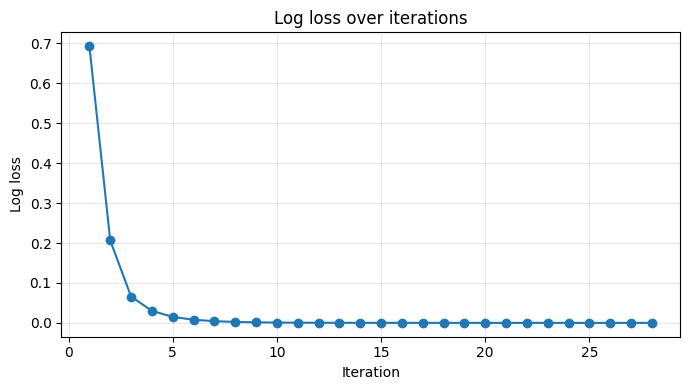

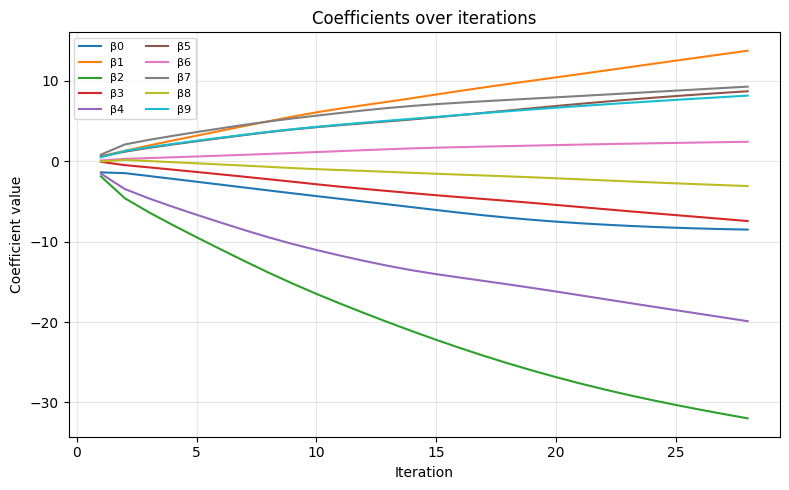

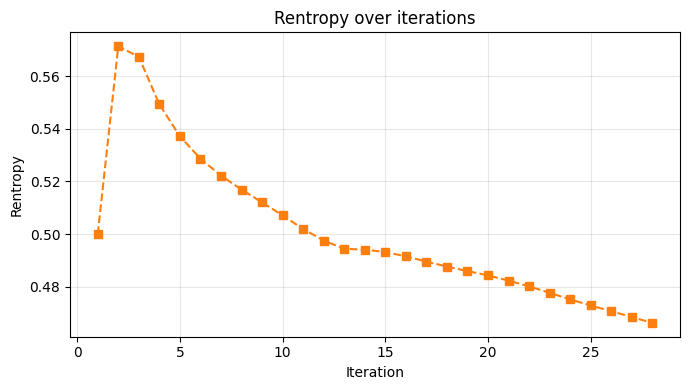

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Use model._history or your provided history list
hist = model._history  # or replace with the list you printed

iterations = np.array([int(rec.get("iteration", i + 1)) for i, rec in enumerate(hist)], dtype=int)
log_loss = np.array([float(rec.get("log_loss", np.nan)) for rec in hist], dtype=float)
rentropy = np.array([float(rec.get("rentropy", np.nan)) for rec in hist], dtype=float)


# Extract coefficients to shape (n_iter, n_coef)
coef_list = [np.asarray(rec.get("coefficients"), dtype=float).ravel() for rec in hist if rec.get("coefficients") is not None]
coeffs = np.vstack(coef_list) if coef_list else None

# 1) Log-loss vs iteration
plt.figure(figsize=(7,4))
plt.plot(iterations, log_loss, "o-", color="tab:blue")
plt.xlabel("Iteration")
plt.ylabel("Log loss")
plt.title("Log loss over iterations")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2) Coefficients vs iteration (one line per coefficient)
if coeffs is not None:
    plt.figure(figsize=(8,5))
    for j in range(coeffs.shape[1]):
        plt.plot(iterations, coeffs[:, j], label=f"β{j}")
    plt.xlabel("Iteration")
    plt.ylabel("Coefficient value")
    plt.title("Coefficients over iterations")
    plt.legend(ncol=2, fontsize=8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# 3) Rentropy vs iteration
plt.figure(figsize=(7,4))
plt.plot(iterations, rentropy, "s--", color="tab:orange")
plt.xlabel("Iteration")
plt.ylabel("Rentropy")
plt.title("Rentropy over iterations")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()